In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,LogisticRegression,Ridge,RidgeCV
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import statsmodels.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [4]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')
df1[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df1.describe()
df1.describe(percentiles=[.68, .69])
# yes, because column shows that 75% of people are travel without parents
# yes, because column shows that 31% of people are travel in spouses

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
68%,606.200000,1.000000,3.000000,35.000000,0.000000,0.000000,26.307500
69%,615.100000,1.000000,3.000000,35.000000,1.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df1.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])
# yes only 1% makes pay for 512 
# no more than 1% higher than 65 years old (99% point to 65.87)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


In [8]:
dfn=df1
dfn2=df2.drop(columns=['PassengerId','Name','Ticket','Cabin'])
dfn1=dfn.drop(columns=['PassengerId','Name','Ticket','Cabin'])
f1=pd.crosstab(index=dfn2['Embarked'],columns='count')
f1
f1=pd.crosstab(index=dfn1['Embarked'],columns='count')
f1
# S feature is most common

col_0,count
Embarked,
C,168
Q,77
S,644


In [9]:
dfn1['Embarked']=dfn1['Embarked'].fillna('S')
dfn1['Embarked'].isnull().values.any()
dfn2['Embarked']=dfn2['Embarked'].fillna('S')
dfn2['Embarked'].isnull().values.any()

False

In [10]:
dfn1['Fare']=dfn1['Fare'].fillna(dfn1['Fare'].median())
dfn1['Fare'].isnull().values.any()
dfn2['Fare']=dfn2['Fare'].fillna(dfn1['Fare'].median())
dfn2['Fare'].isnull().values.any()

False

In [11]:
dfn1.pivot_table(['Age'],index='Pclass',columns='Sex',aggfunc='median')


Age      
Sex    female  male
Pclass             
1        35.0  40.0
2        28.0  30.0
3        21.5  25.0

In [12]:
dfn2.pivot_table(['Age'],index='Pclass',columns='Sex',aggfunc='median')



Age      
Sex    female  male
Pclass             
1        41.0  42.0
2        24.0  28.0
3        22.0  24.0

In [13]:
dfn1['Age'].loc[(dfn1['Age'].isnull()) & (dfn1['Pclass']==1) & (dfn1['Sex']=='female')]=35
dfn1['Age'].loc[(dfn1['Age'].isnull()) & (dfn1['Pclass']==2) & (dfn1['Sex']=='female')]=28
dfn1['Age'].loc[(dfn1['Age'].isnull()) & (dfn1['Pclass']==3) & (dfn1['Sex']=='female')]=21.5
dfn1['Age'].loc[(dfn1['Age'].isnull()) & (dfn1['Pclass']==1) & (dfn1['Sex']=='male')]=40
dfn1['Age'].loc[(dfn1['Age'].isnull()) & (dfn1['Pclass']==2) & (dfn1['Sex']=='male')]=30
dfn1['Age'].loc[(dfn1['Age'].isnull()) & (dfn1['Pclass']==3) & (dfn1['Sex']=='male')]=25

In [14]:
dfn2['Age'].loc[(dfn2['Age'].isnull()) & (dfn2['Pclass']==1) & (dfn2['Sex']=='female')]=41
dfn2['Age'].loc[(dfn2['Age'].isnull()) & (dfn2['Pclass']==2) & (dfn2['Sex']=='female')]=24
dfn2['Age'].loc[(dfn2['Age'].isnull()) & (dfn2['Pclass']==3) & (dfn2['Sex']=='female')]=22
dfn2['Age'].loc[(dfn2['Age'].isnull()) & (dfn2['Pclass']==1) & (dfn2['Sex']=='male')]=42
dfn2['Age'].loc[(dfn2['Age'].isnull()) & (dfn2['Pclass']==2) & (dfn2['Sex']=='male')]=28
dfn2['Age'].loc[(dfn2['Age'].isnull()) & (dfn2['Pclass']==3) & (dfn2['Sex']=='male')]=24

In [15]:
dfn1['Sex']=dfn1['Sex'].replace('male',1)
dfn1['Sex']=dfn1['Sex'].replace('female',0)
dfn2['Sex']=dfn2['Sex'].replace('male',1)
dfn2['Sex']=dfn2['Sex'].replace('female',0)

In [16]:
dfnc1=dfn1.copy()
dfknn=dfn1.copy()
dfnc2=dfn2.copy()

In [17]:
dfnc1['Age']=dfnc1['Age'].replace(dfn1['Age'].loc[(dfn1['Age']>=0) & (dfn1['Age']<=16)].tolist(), '0-16')
dfnc1['Age']=dfnc1['Age'].replace(dfn1['Age'].loc[(dfn1['Age']>16) & (dfn1['Age']<=32)].tolist(), '16-32')
dfnc1['Age']=dfnc1['Age'].replace(dfn1['Age'].loc[(dfn1['Age']>32) & (dfn1['Age']<=48)].tolist(), '32-48')
dfnc1['Age']=dfnc1['Age'].replace(dfn1['Age'].loc[(dfn1['Age']>48) & (dfn1['Age']<=64)].tolist(), '48-64')
dfnc1['Age']=dfnc1['Age'].replace(dfn1['Age'].loc[(dfn1['Age']>64) & (dfn1['Age']<=100)].tolist(), '64-100')
dfnc2['Age']=dfnc2['Age'].replace(dfn2['Age'].loc[(dfn2['Age']>=0) & (dfn2['Age']<=16)].tolist(), '0-16')
dfnc2['Age']=dfnc2['Age'].replace(dfn2['Age'].loc[(dfn2['Age']>16) & (dfn2['Age']<=32)].tolist(), '16-32')
dfnc2['Age']=dfnc2['Age'].replace(dfn2['Age'].loc[(dfn2['Age']>32) & (dfn2['Age']<=48)].tolist(), '32-48')
dfnc2['Age']=dfnc2['Age'].replace(dfn2['Age'].loc[(dfn2['Age']>48) & (dfn2['Age']<=64)].tolist(), '48-64')
dfnc2['Age']=dfnc2['Age'].replace(dfn2['Age'].loc[(dfn2['Age']>64) & (dfn2['Age']<=100)].tolist(), '64-100')

In [18]:

dfnc1['Fare']=dfnc1['Fare'].replace(dfn1['Fare'].loc[(dfn1['Fare']>=0) & (dfn1['Fare']<=7.90)].tolist(), '0-7.9')
dfnc1['Fare']=dfnc1['Fare'].replace(dfn1['Fare'].loc[(dfn1['Fare']>7.9) & (dfn1['Fare']<=14.5)].tolist(), '7.9-14.5')
dfnc1['Fare']=dfnc1['Fare'].replace(dfn1['Fare'].loc[(dfn1['Fare']>14.5) & (dfn1['Fare']<=31)].tolist(), '14.5-31')
dfnc1['Fare']=dfnc1['Fare'].replace(dfn1['Fare'].loc[(dfn1['Fare']>31) & (dfn1['Fare']<=600)].tolist(), '31-600')
dfnc2['Fare']=dfnc2['Fare'].replace(dfn2['Fare'].loc[(dfn2['Fare']>=0) & (dfn2['Fare']<=7.9)].tolist(), '0-7.9')
dfnc2['Fare']=dfnc2['Fare'].replace(dfn2['Fare'].loc[(dfn2['Fare']>7.9) & (dfn2['Fare']<=14.5)].tolist(), '7.9-14.5')
dfnc2['Fare']=dfnc2['Fare'].replace(dfn2['Fare'].loc[(dfn2['Fare']>14.5) & (dfn2['Fare']<=31)].tolist(), '14.5-31')
dfnc2['Fare']=dfnc2['Fare'].replace(dfn2['Fare'].loc[(dfn2['Fare']>31) & (dfn2['Fare']<=600)].tolist(), '31-600')


In [19]:
dfnc1['Size']=dfnc1['SibSp']+dfnc1['Parch']
dfnc1=dfnc1.drop(columns=['SibSp','Parch'])

In [20]:
dfnc2['Size']=dfnc2['SibSp']+dfnc2['Parch']
dfnc2=dfnc2.drop(columns=['SibSp','Parch'])


In [21]:
dfnc1['Alone']=dfnc1['Size'].loc[(dfnc1['Size']==0)]
dfnc1['Alone']=dfnc1['Alone'].fillna(1)
dfnc2['Alone']=dfnc2['Size'].loc[(dfnc2['Size']==0)]
dfnc2['Alone']=dfnc2['Alone'].fillna(1)

In [22]:
dfenhanced1=dfnc1.copy()
dfenhanced2=dfnc2.copy()

In [23]:
dfnc1['Alone']=dfnc1['Alone'].astype('category')
dfnc1['Size']=dfnc1['Size'].astype('category')
dfnc1['Sex']=dfnc1['Sex'].astype('category')
dfnc2['Alone']=dfnc2['Alone'].astype('category')
dfnc2['Size']=dfnc2['Size'].astype('category')
dfnc2['Sex']=dfnc2['Sex'].astype('category')
dfnc1['Pclass']=dfnc1['Pclass'].astype('category')
dfnc2['Pclass']=dfnc2['Pclass'].astype('category')

In [24]:
dfenhanced2['Sex']=dfenhanced2['Sex'].astype('category')
dfenhanced1['Sex']=dfenhanced1['Sex'].astype('category')
dfenhanced1['Alone']=dfenhanced1['Alone'].astype('category')
dfenhanced2['Alone']=dfenhanced2['Alone'].astype('category')

Here I will construct three different models for predicting

The first model is categorical variable+get dummies models. From the nature of the data, I find that except for age and fare, almost all variables could only exist on integers. So I intepret model into full categorical models, in this way, all of variables are categorical, and split it into 0,1 in get dummies

The second model is using original model without transformation. It is mainly used for KNN, because KNN measures distance. It is not available to full categorical model

The third model is using Pclass and Size for integers while others remain categorical. It is reasonable to consider the relationship between customer's relatives with their ticket class. It is probable that some customer purchase higher class or lower class than those travel alone. 

I assume second model will work worst, because some variable cannot be regarded as integers.

Third model might work as effective as first model.

In [25]:
dft1=pd.get_dummies(dfnc1)
dft2=pd.get_dummies(dfnc2)
y=dft1['Survived']
X=dft1.drop(columns='Survived')



In [26]:
poly=PolynomialFeatures(degree=2,interaction_only=False)
polydf=dfenhanced1[['Pclass','Size']]
Xarr=poly.fit_transform(polydf)
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(polydf.columns,p) for p in poly.powers_]]
Xe = pd.DataFrame(Xarr, columns = target_feature_names)

polydf2=dfenhanced2[['Pclass','Size']]
Xarr2=poly.fit_transform(polydf2)
target_feature_names2= ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(polydf2.columns,p) for p in poly.powers_]]
Xe2= pd.DataFrame(Xarr2, columns = target_feature_names2)

poly3=PolynomialFeatures(degree=3,interaction_only=False)
polydf3=dfenhanced1[['Pclass','Size']]
Xarr3=poly.fit_transform(polydf3)
target_feature_names3 = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(polydf3.columns,p) for p in poly.powers_]]
Xe3 = pd.DataFrame(Xarr3, columns = target_feature_names3)

In [27]:
dfe1=dfenhanced1.drop(columns=['Pclass','Size'])
dfe1[Xe.columns]=Xe.values
dfe2=dfenhanced2.drop(columns=['Pclass','Size'])
dfe2[Xe.columns]=Xe2.values
dfe3=dfenhanced1.drop(columns=['Pclass','Size'])
dfe3[Xe3.columns]=Xe3.values

I assume 34% test set in this case

In [28]:

p1=dfe1.drop(columns='Survived')
Xi=pd.get_dummies(p1,prefix=['Age', 'Fare','Sex','Embarked','Alone'], columns=['Age', 'Fare','Sex','Embarked','Alone'])
yi=dfe1['Survived']
X_train2,X_test2,y_train2,y_test2=train_test_split(Xi,yi,train_size=0.66,test_size=0.34,random_state=0)

In [29]:
training_accuracy = []
test_accuracy = []
nn = range(1,39)


In [30]:
knn1=dfknn.drop(columns=['Embarked','Survived','Sex'])
knny=dfknn['Survived']
scaler1=MinMaxScaler(feature_range=(0,1))
knni=scaler1.fit_transform(knn1)


In [31]:
knn1[knn1.columns]=knni
X_train1,X_test1,y_train1,y_test1=train_test_split(knn1,knny,train_size=0.66,test_size=0.34,random_state=0)
X_train1[:5]

,Pclass,Age,SibSp,Parch,Fare
78,0.5,0.005152,0.0,0.333333,0.056604
889,0.0,0.321438,0.0,0.000000,0.058556
198,1.0,0.264891,0.0,0.000000,0.015127
492,0.0,0.685851,0.0,0.000000,0.059532
813,1.0,0.070118,0.5,0.333333,0.061045


In [32]:
for k in nn:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, y_train1)
    training_accuracy.append(knn.score(X_train1, 
                                         y_train1))
    test_accuracy.append(knn.score(X_test1, 
                                     y_test1))

In [33]:
max1 = max(test_accuracy)
max1

0.7458745874587459

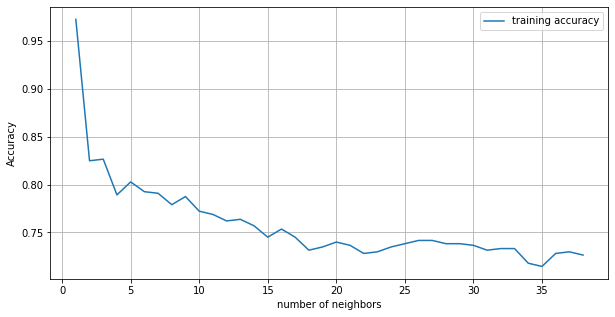

In [34]:
plt.figure(figsize=(10,5))
plt.plot(nn, training_accuracy, 
         label="training accuracy")
plt.ylabel("Accuracy")
plt.xlabel("number of neighbors")
plt.legend()
plt.grid()

11

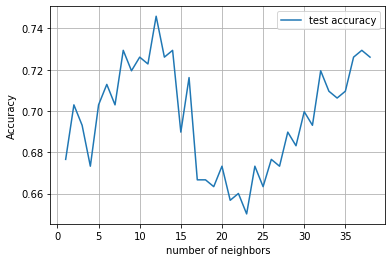

In [35]:
plt.plot(nn, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("number of neighbors")
plt.legend()
plt.grid()
test_accuracy.index(max(test_accuracy))

In [36]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train1, y_train1)
grid.best_score_,grid.best_params_

(0.7381355932203391, {'n_neighbors': 8})

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.66,test_size=0.34,random_state=0)

In [38]:
# SVM gridsearchCV
param_grid= {'C':[0.01,0.1,1,10],'gamma':[0.5,1,2,3]}
clf = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5,
                  scoring='accuracy',iid=False)
clf.fit(X_train,y_train)
clf.best_params_

{'C': 1, 'gamma': 0.5}

In [39]:
clf.best_estimator_

SVC(C=1, gamma=0.5)

In [40]:
y_pred = clf.best_estimator_.predict(X_test)
pd.DataFrame(confusion_matrix(y_test,y_pred),index=clf.best_estimator_.classes_,
                                          columns=clf.best_estimator_.classes_)

,0,1
0,172,18
1,34,79


In [41]:
clf.best_estimator_.score(X_test,y_test)

0.8283828382838284

In [42]:
param_grid= {'C':[0.01,0.1,1,10],'gamma':[0.5,1,2,3]}
clf = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5,
                  scoring='accuracy',iid=False)
clf.fit(X_train2,y_train2)
clf.best_params_
clf.best_estimator_.score(X_test2,y_test2)

0.8283828382838284

I may try K fold cross validation here to see if the model have any unbalanced training set may cause overfit/underfit
Then I will use GridSearchCV

In [43]:
# LogisticRegression
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)
model = LogisticRegression(solver = 'lbfgs',max_iter=10000)
scores = cross_val_score(model,X_train,y_train,cv=kfold)
scores

array([0.76271186, 0.87288136, 0.77966102, 0.82051282, 0.75213675])

In [44]:
scores.mean()

0.7975807619875417

Overall, this train set isn't working very well.

In [45]:
grid={"C":[0.001,0.01,0.1,1,5,10,20,50,100], "penalty":["l1","l2"]}
logreg=LogisticRegression(max_iter=5000,random_state=0)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)
logreg_cv.best_estimator_

LogisticRegression(C=5, max_iter=5000, random_state=0)

In [46]:
model=LogisticRegression(C=5, max_iter=5000, random_state=0)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8052805280528053

In [47]:
grid={"C":[0.001,0.01,0.1,1,5,10,20,50,100], "penalty":["l1","l2"]}
logreg=LogisticRegression(max_iter=5000,random_state=0)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train2,y_train2)
logreg_cv.best_estimator_

LogisticRegression(C=0.1, max_iter=5000, random_state=0)

In [48]:
model=LogisticRegression(C=0.1, max_iter=5000, random_state=0)
model.fit(X_train2,y_train2)
model.score(X_test2,y_test2)

0.7920792079207921

In [49]:
#Gradient boosting
boosted2 = GradientBoostingClassifier(n_estimators = 25,learning_rate = 0.2,
                                      max_depth = 4, random_state =0)
boosted2.fit(X_train,y_train)
boosted2.fit(X_train,y_train)
boosted2.score(X_test,y_test)

0.8283828382838284

In [50]:
df9 = pd.DataFrame(boosted2.feature_importances_*100,index = X.columns,columns = ['Importance'])
df9[:5]

,Importance
Pclass_1,4.219145
Pclass_2,0.561685
Pclass_3,11.878433
Sex_0,35.519363
Sex_1,17.355585


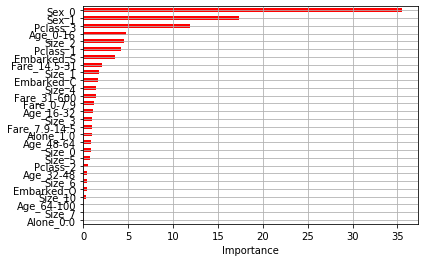

In [51]:
df9 = df9.sort_values(by='Importance',axis=0)
df9.plot(kind='barh',color='r',legend=False)
plt.xlabel('Importance')
plt.grid()

In [52]:
params = {'learning_rate': np.arange(0.02,0.24,0.05),
              'n_estimators':[10,25,50,100]
              ,'max_depth':[3,5,7,9]}
params

{'learning_rate': array([0.02, 0.07, 0.12, 0.17, 0.22]),
 'n_estimators': [10, 25, 50, 100],
 'max_depth': [3, 5, 7, 9]}

In [53]:
grid_search = GridSearchCV(boosted2, param_grid = params,scoring='accuracy', 
                           cv = 5,iid = False,
                           return_train_score=True)
grid_search.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                  max_depth=4, n_estimators=25,
                                                  random_state=0),
             iid=False,
             param_grid={'learning_rate': array([0.02, 0.07, 0.12, 0.17, 0.22]),
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [10, 25, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [54]:
grid_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.02, max_depth=5, n_estimators=25,
                           random_state=0)

In [55]:
boosted2 = GradientBoostingClassifier(learning_rate=0.02, max_depth=5, n_estimators=25,
                           random_state=0)
boosted2.fit(X_train,y_train)
boosted2.fit(X_train,y_train)
boosted2.score(X_test,y_test)

0.8250825082508251

In [56]:
results = pd.DataFrame(grid_search.cv_results_)

In [57]:
dropcols = [0,1,2,3,6]
results.drop(results.columns[dropcols],axis=1,inplace = True)

In [58]:
results.mean_test_score.max()

0.814616833260901

In [59]:
boosted3 = GradientBoostingClassifier(n_estimators = 25,learning_rate = 0.2,
                                      max_depth = 4, random_state =0)
boosted3.fit(X_train2,y_train2)
boosted3.fit(X_train2,y_train2)
boosted3.score(X_test2,y_test2)
grid_search2 = GridSearchCV(boosted2, param_grid = params,scoring='accuracy', 
                           cv = 5,iid = False,
                           return_train_score=True)
grid_search2.fit(X_train2,y_train2)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.02,
                                                  max_depth=5, n_estimators=25,
                                                  random_state=0),
             iid=False,
             param_grid={'learning_rate': array([0.02, 0.07, 0.12, 0.17, 0.22]),
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [10, 25, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [60]:

results2 = pd.DataFrame(grid_search2.cv_results_)
dropcols = [0,1,2,3,6]
results2.drop(results2.columns[dropcols],axis=1,inplace = True)
results2.mean_test_score.max()

0.8197450383891061

In [61]:
forest = RandomForestClassifier(max_features = 5,n_estimators = 25,
                                max_depth = 4,random_state = 0)
forest.fit(X_train,y_train)
forest.score(X_test,y_test)

0.8151815181518152

In [62]:
forest2 = RandomForestClassifier(max_features = 5,n_estimators = 25,
                                max_depth = 4,random_state = 0)
forest2.fit(X_train2,y_train2)
forest2.score(X_test2,y_test2)

0.801980198019802

In [63]:
tmax_features=[1,3,5,7,9,11]
tmax_depth=[1,3,4,6,7,8]
nes=[50,100,150,200]
params={}
params['max_features']=tmax_features
params['max_depth']=tmax_depth
params['n_estimators']=nes

In [64]:
grid_search = GridSearchCV(forest, param_grid = params,cv = 5,iid = False)
grid_search.fit(X_train,y_train)
grid_search2 = GridSearchCV(forest2, param_grid = params,cv = 5,iid = False)
grid_search2.fit(X_train2,y_train2)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, max_features=5,
                                              n_estimators=25, random_state=0),
             iid=False,
             param_grid={'max_depth': [1, 3, 4, 6, 7, 8],
                         'max_features': [1, 3, 5, 7, 9, 11],
                         'n_estimators': [50, 100, 150, 200]})

In [65]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=6, max_features=1, n_estimators=150,
                       random_state=0)

In [66]:
grid_search2.best_estimator_

RandomForestClassifier(max_depth=3, max_features=5, n_estimators=200,
                       random_state=0)

In [67]:
forest = RandomForestClassifier(max_depth=6, max_features=1, n_estimators=150,
                       random_state=0)
forest.fit(X_train,y_train)
forest.score(X_test,y_test)

0.8184818481848185

In [68]:
forest2 = RandomForestClassifier(max_depth=3, max_features=5, n_estimators=200,
                       random_state=0)
forest2.fit(X_train2,y_train2)
forest2.score(X_test2,y_test2)

0.8085808580858086

In [69]:
preds=boosted2.predict(dft2)
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [70]:
my_submission = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': preds})
my_submission.to_csv('submission.csv', index=False)


From our analysis result, we got several insights. First, the best predicting model are SVM using model 1 and model 3 and Gradient Boosting using model 1. All of these achieved an accuracy rate of 0.828.Gradient boosting using model 3 having accuracy rate of 0.825. Random forest, logistic using model 1 and 3 and are having accuracy rate about 0.80-0.81. The worst predicting model is KNN, the test accuracy rate is only about 75%. I use gradient boosting in model 1 as prediction for test set. My submit result is showing this prediction result.


I will use neural network to predict in my last part, to see if the predicting accuracy is improved or not.

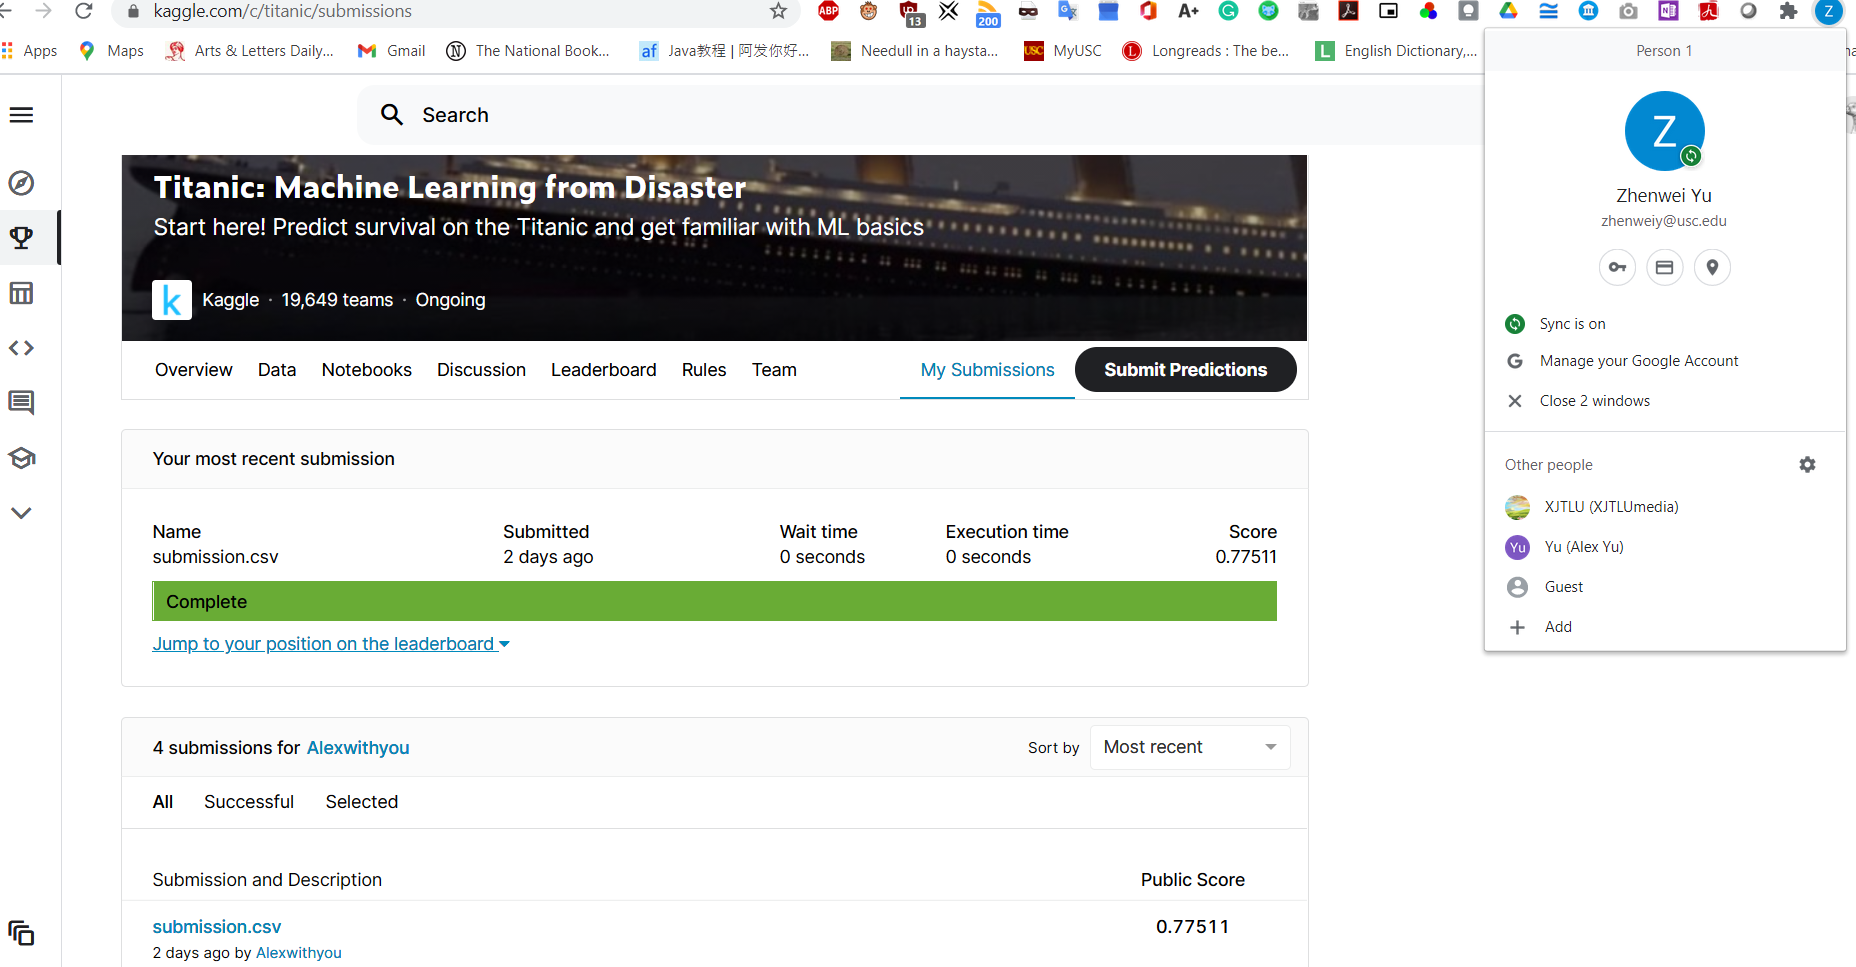

In [3]:
from IPython.display import Image
Image(filename = "t1.png", width=100, height=100) 

In [71]:
# NN prediction
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [72]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

0.8118811881188119

In [73]:
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,2000,3000,4000], 'alpha': [0.01,0.1,1,5,10], 'hidden_layer_sizes':[50,80,100,120], 'random_state':[0]}
clf = GridSearchCV(MLPClassifier(), parameters,scoring='accuracy', n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10],
                         'hidden_layer_sizes': [50, 80, 100, 120],
                         'max_iter': [1000, 2000, 3000, 4000],
                         'random_state': [0], 'solver': ['lbfgs']},
             scoring='accuracy')

In [74]:
clf.score(X_test,y_test)

0.8184818481848185

In [75]:
clf.best_estimator_

MLPClassifier(alpha=5, hidden_layer_sizes=80, max_iter=1000, random_state=0,
              solver='lbfgs')

In [76]:
mlp = MLPClassifier(alpha=5, hidden_layer_sizes=80, max_iter=1000, random_state=0,
              solver='lbfgs')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

0.8184818481848185

In [77]:
mlp2 = MLPClassifier(alpha=5, hidden_layer_sizes=80, max_iter=1000, random_state=0,
              solver='lbfgs')
mlp2.fit(X_train2, y_train2)
y_pred2 = mlp2.predict(X_test2)
accuracy_score(y_test2, y_pred2)

0.8217821782178217

Neural network achieved an 81% to 82% of test accuracy rate. It is good but not the best model for predicting here